# IAT 461 Final Project - Initial EDA
Olivia Steed 301421820
Robin de Zwart 301336060

For our project we are using this Olympic history dataset found on Kaggle: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results?resource=download. It includes data from Athens 1896 to Rio 2016, and 
has 271116 rows, one corresponding to each athlete, and 15 columns including the olympics and result data related to them.

Columns:
- ID - Unique number for each athlete
- Name - Athlete's name
- Sex - M or F
- Age - Integer
- Height - In centimeters
- Weight - In kilograms
- Team - Team name
- NOC - National Olympic Committee 3-letter code
- Games - Year and season
- Year - Integer
- Season - Summer or Winter
- City - Host city
- Sport - Sport
- Event - Event
- Medal - Gold, Silver, Bronze, or NA

Questions 

Focus 1: What is the strongest predictor of qualifying for a medal?
- What factors contribute most strongly to winning?
- Are there common qualities gold medalists have?
- Do these qualities change based on the sport? Are some sports easier to predict than others?

Focus 2: How have the Olympics evolved over time?
- Have medalist attributes changed over time?
- How have the participating countries and participants per country evolved?
- How has the balance of female and male athletes changed over time?
- How has the amount of sports and medals changed over time?


Methods
- Overall athlete success indicators - using clustering to create athlete performance clusters
- Athlete success indicators by sport - using linear regression to predict which traits most strongly predict winning a medal

In [13]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("athlete_events.csv")

In [8]:
# preview the dataframe
df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [10]:
# check how many null values there are in each column
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Out of 271,115 rows of athletes, we are missing the age from 9474, the height from 60,171, and the weight from 62,875. These are large numbers, so we will try removing them, using mean, and using linear regression imputation to fill them and compare the results to decide which method to proceed with.

The medal column uses a null value to indicate not winning a medal, but this is confusing so we will replace the missing value with 'None' to show that the athlete just didn't win a medal but the data is not missing.

In [40]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


These summary statistics can start to show us an idea of the most common age, height, and weight of athletes who qualify to the Olympics.

- We can see that the mean age is 25.5 years with a low variance, since the standard deviation is only 6 years. The minimim age is 10 years (what?!), and the maximum is 97 (what?!!), which both seem like outliers. The mean is a bit larger than the median, indicating a very slightly right skewed distribution that is pretty close to normal.

- The mean height is 175cm, with a slightly wider variation, as the standard deviation is 10.5cm. The minimum is 127cm and the maximum is 226cm. because the mean and the median are the same, the distribution appears close to normal.

- The mean weight is 70kg, with the largest standard deviation of 14kg, with the minimum at 25kg and the maximum at 214kg. These both seem like extreme outliers, so we will consult a boxplot. The mean and the median are almost the same, indicating a near normal distribution.



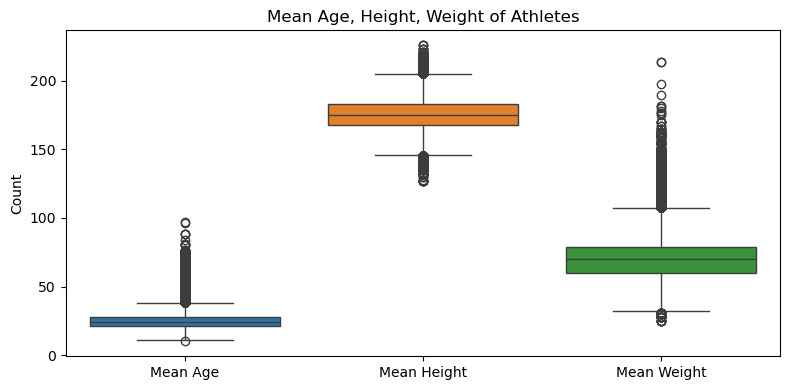

In [21]:
# looking at age data box plot

plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['Age', 'Height', 'Weight']])
plt.title('Mean Age, Height, Weight of Athletes')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Mean Age', 'Mean Height', 'Mean Weight'])
plt.tight_layout()
plt.show()

This boxplot confirms that the basic attributes of age, height, and weight have some clear low, and especially high, outliers. Interestingly, the middle quartiles and median all look even, indicating close to normal distributions with outliers on each side. We will test removing these later on to check how they change resulting models.

Weight has the most outliers, followed by age, and at least some of these should be removed to avoid skewing the data high. Height has evenly balanced high and low outliers which may cancel each other out. Age also has significant high outliers which could be removed to create a cleaner model.

This extreme variation could also be a function of the wide variety of sports, all requiring different body types for success. It may be a better approach to analyze the age, height, and weight by sport, and then remove outliers from indvidual sports to avoid removing all the light or heavy athletes and accidentally removing whole sports from the dataset.

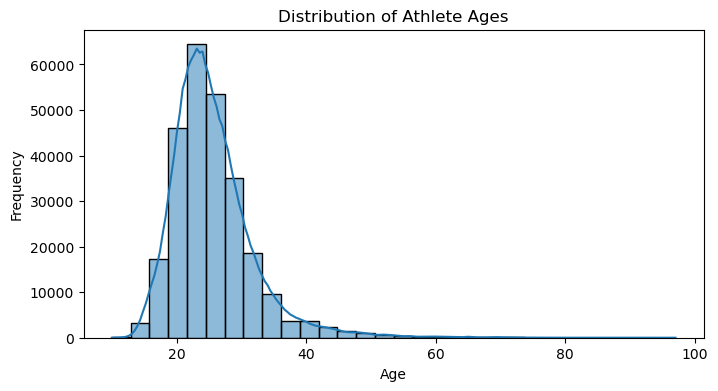

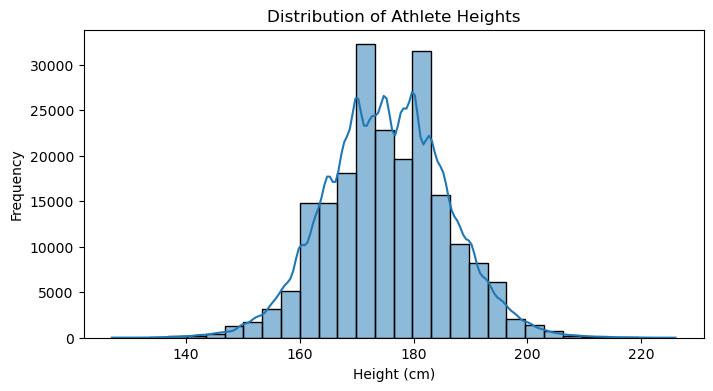

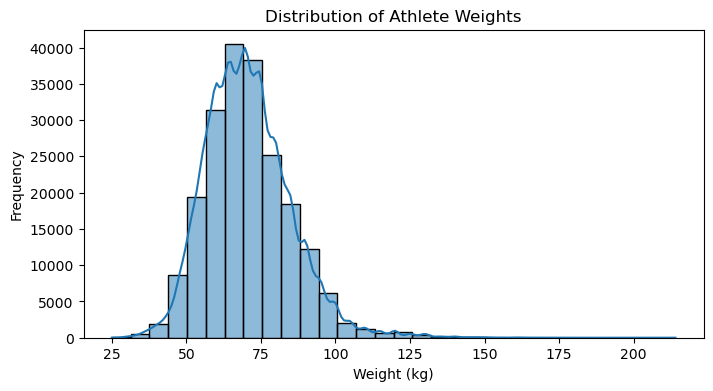

In [23]:
# looking at age, height, weight data histogram

plt.figure(figsize=(8, 4))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Athlete Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df['Height'].dropna(), bins=30, kde=True)
plt.title('Distribution of Athlete Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(df['Weight'].dropna(), bins=30, kde=True)
plt.title('Distribution of Athlete Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

The histograms give us an idea of the shape of the distribution. Overall, all of them are pretty close to normally distributed, but as seen above the age and weight values have some outliers that right skew the data, especially the age data. We will look at the ages by sport later to see if eliminating outliers improves results.

Here I'll do an initial check of the summary statistics from a couple of select sports to compare the distributions and outliers to see if this is common to all sports, or just the result of mixing so many extreme body types together into one analysis.

In [25]:
# get dataframe of athletes for each sport

# START [ChatGPT 4.o)]"i have a dataframe with olympics data with a row per athlete and then columns for things like age, height, weight, season, year, sport etc. i want to separate this into a dataframe for each sport (like one with all the athletes for basketball, one with all judo etc...) so i can calculate summary statistics for each. how would i do this?"

sport_dfs = {sport: sport_df for sport, sport_df in df.groupby('Sport')}

for sport, sport_df in sport_dfs.items():
    print(f"Summary statistics for {sport}:")
    print(sport_df[['Age', 'Height', 'Weight']].describe())
    print("\n")

# END [ChatGPT 4.o)]

Summary statistics for Aeronautics:
        Age  Height  Weight
count   1.0     0.0     0.0
mean   26.0     NaN     NaN
std     NaN     NaN     NaN
min    26.0     NaN     NaN
25%    26.0     NaN     NaN
50%    26.0     NaN     NaN
75%    26.0     NaN     NaN
max    26.0     NaN     NaN


Summary statistics for Alpine Skiing:
               Age       Height       Weight
count  8751.000000  6394.000000  6350.000000
mean     23.205462   173.489052    72.068110
std       3.987876     7.848716    11.283889
min      14.000000   142.000000    45.000000
25%      20.000000   168.000000    63.000000
50%      23.000000   173.000000    71.000000
75%      25.000000   180.000000    81.000000
max      55.000000   200.000000   107.000000


Summary statistics for Alpinism:
             Age  Height  Weight
count  16.000000     0.0     0.0
mean   38.812500     NaN     NaN
std     9.703736     NaN     NaN
min    22.000000     NaN     NaN
25%    33.000000     NaN     NaN
50%    38.000000     NaN     NaN
7

In [ ]:
# show list of sports
sport_dfs.keys()

dict_keys(['Aeronautics', 'Alpine Skiing', 'Alpinism', 'Archery', 'Art Competitions', 'Athletics', 'Badminton', 'Baseball', 'Basketball', 'Basque Pelota', 'Beach Volleyball', 'Biathlon', 'Bobsleigh', 'Boxing', 'Canoeing', 'Cricket', 'Croquet', 'Cross Country Skiing', 'Curling', 'Cycling', 'Diving', 'Equestrianism', 'Fencing', 'Figure Skating', 'Football', 'Freestyle Skiing', 'Golf', 'Gymnastics', 'Handball', 'Hockey', 'Ice Hockey', 'Jeu De Paume', 'Judo', 'Lacrosse', 'Luge', 'Military Ski Patrol', 'Modern Pentathlon', 'Motorboating', 'Nordic Combined', 'Polo', 'Racquets', 'Rhythmic Gymnastics', 'Roque', 'Rowing', 'Rugby', 'Rugby Sevens', 'Sailing', 'Shooting', 'Short Track Speed Skating', 'Skeleton', 'Ski Jumping', 'Snowboarding', 'Softball', 'Speed Skating', 'Swimming', 'Synchronized Swimming', 'Table Tennis', 'Taekwondo', 'Tennis', 'Trampolining', 'Triathlon', 'Tug-Of-War', 'Volleyball', 'Water Polo', 'Weightlifting', 'Wrestling'])

I'm going to pick Weightlifting and Rhythmic Gymnastics to look at individually, since I am assuming each of these has a different ideal physique and age range, so will give more insight into outliers than analyzing all sports. 

Making this list of sports shows one called 'Athletics' and one called 'Art Competitions' which seem unrelated to Olympics, so will have to be checked later.

In [34]:
# extracting individual datarframes for specific sports

weightlifting_df = sport_dfs['Weightlifting']
rhythmic_gymnastics_df = sport_dfs['Rhythmic Gymnastics']

In [29]:
# looking into weightlifting

weightlifting_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3937 entries, 80 to 271010
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3937 non-null   int64  
 1   Name    3937 non-null   object 
 2   Sex     3937 non-null   object 
 3   Age     3731 non-null   float64
 4   Height  3008 non-null   float64
 5   Weight  3803 non-null   float64
 6   Team    3937 non-null   object 
 7   NOC     3937 non-null   object 
 8   Games   3937 non-null   object 
 9   Year    3937 non-null   int64  
 10  Season  3937 non-null   object 
 11  City    3937 non-null   object 
 12  Sport   3937 non-null   object 
 13  Event   3937 non-null   object 
 14  Medal   646 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 492.1+ KB


In [30]:
weightlifting_df.describe()

,ID,Age,Height,Weight,Year
count,3937.000000,3731.000000,3008.000000,3803.000000,3937.000000
mean,69105.432563,25.502010,167.824801,78.726663,1980.595377
std,39175.024686,4.353875,9.949635,22.602393,26.744293
min,22.000000,15.000000,140.000000,47.000000,1896.000000
25%,34472.000000,22.000000,160.000000,60.000000,1964.000000
50%,70509.000000,25.000000,168.000000,75.000000,1984.000000
75%,103267.000000,28.000000,175.000000,90.000000,2004.000000
max,135521.000000,45.000000,205.000000,176.500000,2016.000000


Looking at the first individual sport, weightlifting, we can see that analyzing sports individually might be an issue due to limited number of athletes in each sport, as this one only has 3937, which is not as much to build a model off of as the over 200,000 total records. It may be a good idea to cluster the sports by athlete similarity first, and then analyze the summary statistics and predict outcomes for these smaller aggregate groups.

Upon analysis we can see that:
- Mean age is 25.5 with small standard deviation of 4. Min is 15 years and max is 45 years with median at 25 indicating normal distribution.

- Mean height is 167.8cm with small standard deviation of 9.9cm, min of 140cm and max of 205cm. Median is almost the same as mean at 168 indicating close to normal distribution.

- Mean weight is 78.7kg with larger standard deviation of 22kg. Min is 47kg and max is 176kg, with median a bit smaller than mean at 75kg. This indicates a right skewed distribution with high outliers.

Compared to the full dataset
- Age - mean:25.5, std:6, min:10, max:97

- Height - mean:175cm, std:10.5cm, min:127cm, max:226cm

- Weight - mean:70kg, std:14kg, min:25kg, max:214kg

Overall weightlifting is similar to the full dataset summary statistics, but as it is a subset, has a smaller age and height range that is normally distributed, and a high leaning weight range.

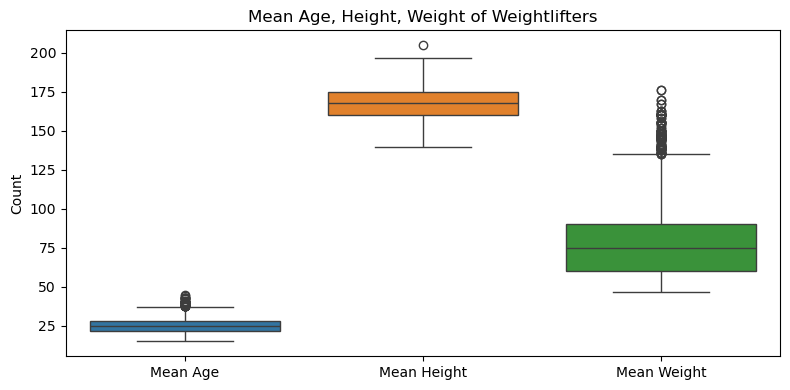

In [31]:
# weightlifting box plot

plt.figure(figsize=(8, 4))
sns.boxplot(data=weightlifting_df[['Age', 'Height', 'Weight']])
plt.title('Mean Age, Height, Weight of Weightlifters')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Mean Age', 'Mean Height', 'Mean Weight'])
plt.tight_layout()
plt.show()

These box plots show that the age, height, and weight of weightlifters are pretty normally distributed because the middle quartiles and medians are relatively centered. However, the weight is skewed by some high outliers that we will explore further with histograms.

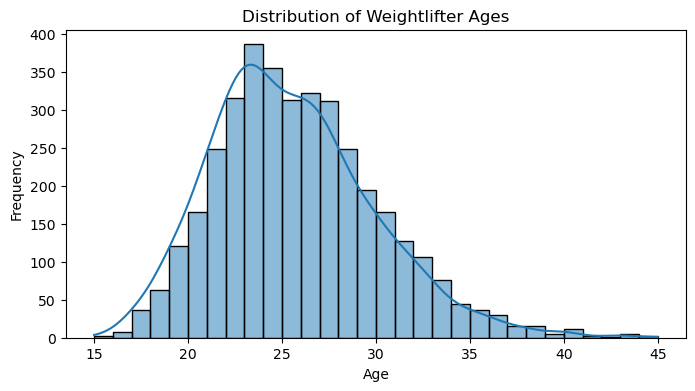

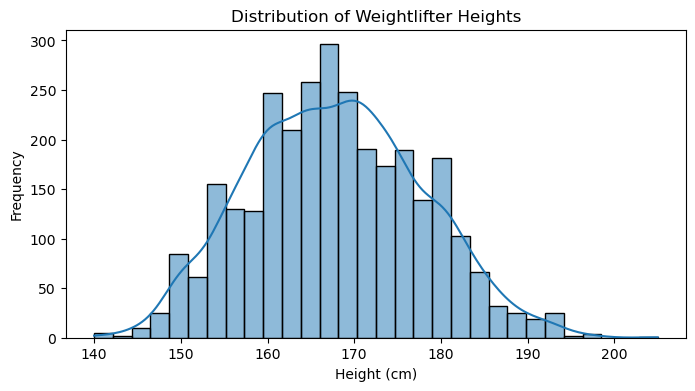

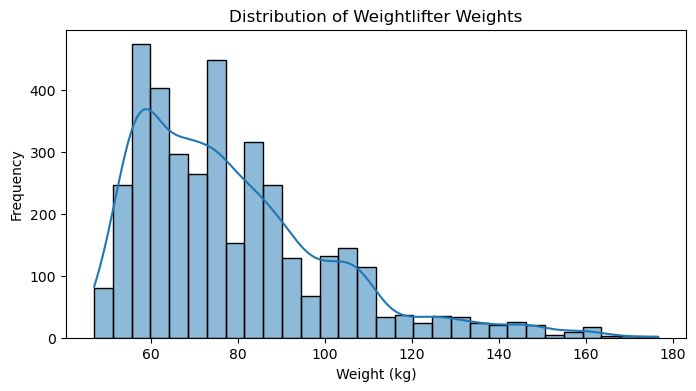

In [39]:
# histograms of weightlifter data

plt.figure(figsize=(8, 4))
sns.histplot(weightlifting_df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Weightlifter Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(weightlifting_df['Height'].dropna(), bins=30, kde=True)
plt.title('Distribution of Weightlifter Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(weightlifting_df['Weight'].dropna(), bins=30, kde=True)
plt.title('Distribution of Weightlifter Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

Because the data subset is a lot smaller than the full dataset, the histograms are less smooth, but the trends they depict are generally common to the full data with a pretty close to normally distributed age and height but of course with smaller ranges than the full data. Interestingly the weight it pretty clearly right skewed, indicating some high outliers.

For the second sport, I'll look at rhythmic gymnastics to compare summary statistics with the full dataset and weightlifter subsets.

In [35]:
rhythmic_gymnastics_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 658 entries, 667 to 270934
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      658 non-null    int64  
 1   Name    658 non-null    object 
 2   Sex     658 non-null    object 
 3   Age     658 non-null    float64
 4   Height  632 non-null    float64
 5   Weight  615 non-null    float64
 6   Team    658 non-null    object 
 7   NOC     658 non-null    object 
 8   Games   658 non-null    object 
 9   Year    658 non-null    int64  
 10  Season  658 non-null    object 
 11  City    658 non-null    object 
 12  Sport   658 non-null    object 
 13  Event   658 non-null    object 
 14  Medal   132 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 82.2+ KB


In [36]:
rhythmic_gymnastics_df.describe()

,ID,Age,Height,Weight,Year
count,658.00000,658.000000,632.000000,615.000000,658.000000
mean,71801.25228,18.737082,167.870253,48.760976,2003.161094
std,38943.85971,2.505250,5.381980,5.177291,9.338626
min,387.00000,13.000000,142.000000,30.000000,1984.000000
25%,37826.00000,17.000000,164.000000,45.000000,1996.000000
50%,74287.50000,18.000000,168.000000,49.000000,2004.000000
75%,104941.75000,20.000000,172.000000,52.000000,2012.000000
max,135488.00000,30.000000,181.000000,64.000000,2016.000000


Analyzing the gymnasts summary statistics:
- Age - mean 18.7 with very small standard deviation of 2.5 indicates tightly clustered data with a small variance. The minimum age is 13 and max is 30, with the median at 18, indicating a close to normal distribution.

- Height - mean height is 167cm with slightly larger standard deviation of 5.3cm, indicating another relatively tight data spread with small variance. The minimum is 142cm and the maximum is 181cm, with the median at 168cm, indicating a close to normal distribution since it is almost the same as the mean.

- Weight - the mean weight is 48kg, with a small standard deviation of 5kg. The min is 30kg and the max is 64kg, with the median at 49kg, indicating a close to normally distributed data range.

Compared to weightlifter subset:
- Age - mean:25.5, std: 4, min:5, max:45, median:25 

- Height - mean:167.8cm, std:9.9cm, min:140cm, max:205cm, median:168cm

- Weight - mean:78.7kg, std:22kg, min:47kg, max:176kg, median:75kg

Compared to the full dataset
- Age - mean:25.5, std:6, min:10, max:97

- Height - mean:175cm, std:10.5cm, min:127cm, max:226cm

- Weight - mean:70kg, std:14kg, min:25kg, max:214kg

Compared the the full and weightlifter dataset, the gymnasts are generally younger and shorter, and significantly lighter.

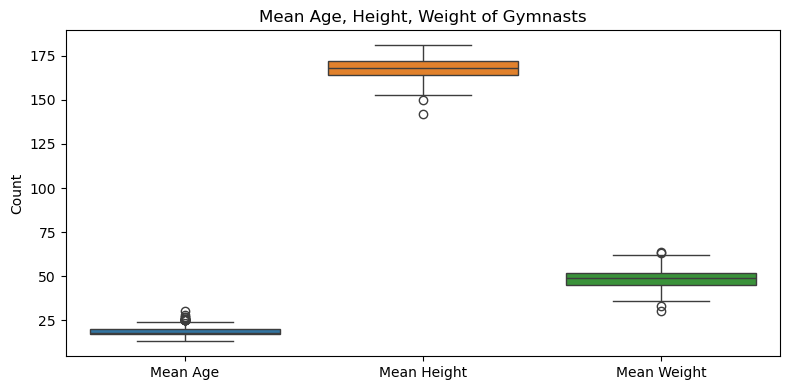

In [37]:
# rhythmic gymnastics box plot

plt.figure(figsize=(8, 4))
sns.boxplot(data=rhythmic_gymnastics_df[['Age', 'Height', 'Weight']])
plt.title('Mean Age, Height, Weight of Gymnasts')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Mean Age', 'Mean Height', 'Mean Weight'])
plt.tight_layout()
plt.show()

These boxplots show the very narrow range of age, height, and weight that gymnasts exhibit, likely because there is a clear ideal body type for gymnasts, but also because all of the rhythmic gymnasts are female, so there is a smaller range of body variation. There are some slight outliers for higher ages, lower heights, and higher and lower weights, but they are so close to the last quartile that they do not seem worth removing.

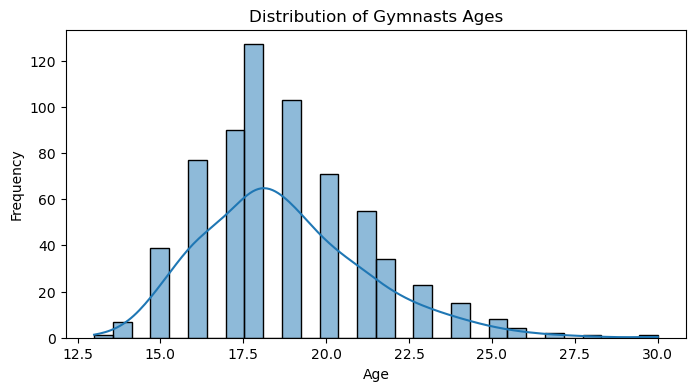

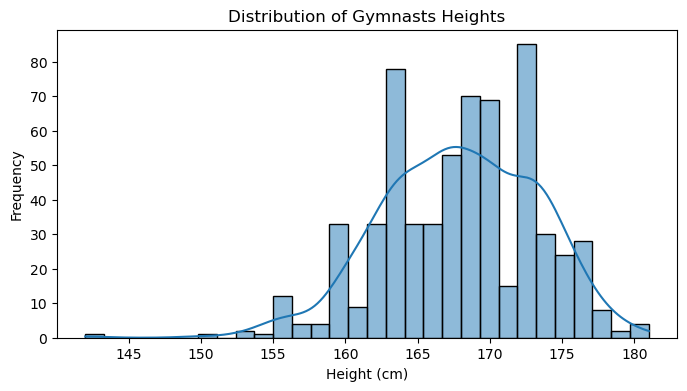

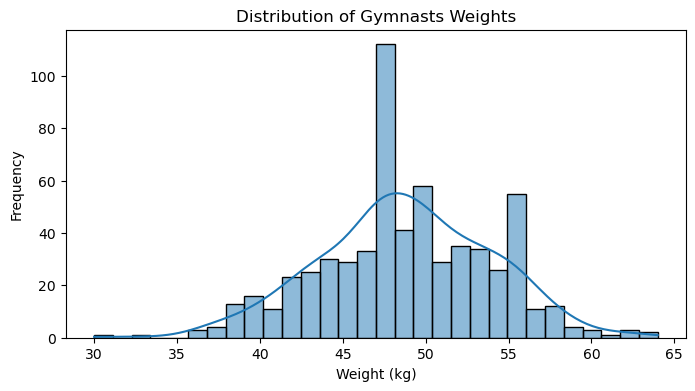

In [38]:
# histograms of gymnasts data

plt.figure(figsize=(8, 4))
sns.histplot(rhythmic_gymnastics_df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Gymnasts Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(rhythmic_gymnastics_df['Height'].dropna(), bins=30, kde=True)
plt.title('Distribution of Gymnasts Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(rhythmic_gymnastics_df['Weight'].dropna(), bins=30, kde=True)
plt.title('Distribution of Gymnasts Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

These histograms show a right skewed age range, indicating that higher ages are outliers, a left skewed height range, indicating that there are some significantly lower heights bringing down the mean, and a relatively normally distributed weight indicating that there is an ideal body composition for the sport. Interestingly, there is a very clear mode at about 47kg that the majority of atheletes fall into.

Analyzing weightlifting and gymnastics separately showed that there are clear and large differences between athletes in each sport, as the gender balance, ideal body composition, and ages differ drastically by sport. Based on this, removing outliers wholesale from the full dataset seems like a good way to remove entire sports from the dataset. 

We are aiming to predict the best predictor of qualifying for a medal, but that will be different for each sport. In light of this, it makes sense to cluster the sports into athlete similarity clusters using bottom-up agglomerative clustering (since we don't know how many athlete similarity groups there are), and then use linear regression to model the medal winning predictors to see what qualities are the most important in each group.